# Machine Learning Model
## COMPTNG 16B Project

### Packages and Data Inspection

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import seaborn as sns

import pandas as pd

# set random seeds
seed_value= 1234
np.random.seed(seed_value)
tf.random.set_seed(seed_value) 

In [2]:
df = pd.read_csv("stats1.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   team              2280 non-null   object 
 1   goals             2280 non-null   int64  
 2   xG                2280 non-null   float64
 3   possession        2280 non-null   float64
 4   passing_accuracy  2280 non-null   float64
 5   shots_on_target   2280 non-null   int64  
 6   shots             2280 non-null   int64  
 7   saves             2280 non-null   int64  
 8   fouls             2280 non-null   int64  
 9   corners           2280 non-null   int64  
 10  crosses           2280 non-null   int64  
 11  touches           2280 non-null   int64  
 12  tackles           2280 non-null   int64  
 13  interceptions     2280 non-null   int64  
 14  aerials_won       2280 non-null   int64  
 15  clearances        2280 non-null   int64  
 16  offsides          2280 non-null   int64  


In [4]:
df.describe()

,goals,xG,possession,passing_accuracy,shots_on_target,shots,saves,fouls,corners,crosses,touches,tackles,interceptions,aerials_won,clearances,offsides,goal_kicks,throw_ins,long_balls
count,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000
mean,1.370175,1.293596,0.500018,0.760360,4.078509,12.335965,2.820614,12.016228,5.107895,12.390351,609.509649,16.674561,8.759649,14.723684,23.493860,1.904825,6.772368,20.550877,62.278509
std,1.255365,0.768005,0.129692,0.076818,2.435382,5.444871,1.934154,3.879176,2.938708,5.626934,139.336363,5.448813,4.824715,7.972306,11.675177,1.613396,3.489271,6.457615,12.707810
min,0.000000,0.000000,0.170000,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,295.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,23.000000
25%,0.000000,0.700000,0.410000,0.710000,2.000000,8.000000,1.000000,9.000000,3.000000,8.000000,508.000000,13.000000,5.000000,9.000000,15.000000,1.000000,4.000000,16.000000,53.000000
50%,1.000000,1.200000,0.500000,0.770000,4.000000,12.000000,3.000000,12.000000,5.000000,12.000000,592.000000,16.000000,8.000000,14.000000,22.000000,2.000000,6.000000,20.000000,62.000000
75%,2.000000,1.700000,0.590000,0.820000,6.000000,16.000000,4.000000,14.000000,7.000000,16.000000,697.000000,20.000000,11.000000,19.000000,30.000000,3.000000,9.000000,25.000000,71.000000
max,9.000000,5.800000,0.830000,0.920000,15.000000,36.000000,13.000000,27.000000,19.000000,41.000000,1104.000000,38.000000,37.000000,61.000000,86.000000,11.000000,23.000000,44.000000,103.000000


In [5]:
df.astype({"xG": "float32", "possession": "float32", "passing_accuracy": "float32"})

,team,goals,xG,possession,passing_accuracy,shots_on_target,shots,saves,fouls,corners,crosses,touches,tackles,interceptions,aerials_won,clearances,offsides,goal_kicks,throw_ins,long_balls
0,Liverpool,4,1.7,0.57,0.79,7,15,5,10,11,15,633,24,11,14,5,0,6,18,57
1,Manchester Utd,2,1.6,0.46,0.79,5,7,3,18,2,8,625,19,14,3,24,3,4,13,57
2,Arsenal,3,2.4,0.59,0.83,4,20,7,13,9,17,604,18,7,6,17,2,8,16,48
3,Everton,0,0.9,0.70,0.81,3,16,0,10,12,24,719,14,5,18,29,1,5,37,72
4,Burnley,2,1.5,0.42,0.74,6,13,2,12,7,17,520,19,10,18,15,1,7,24,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,Everton,0,1.0,0.65,0.79,2,10,2,13,2,15,703,17,8,18,24,0,5,39,65
2276,Southampton,0,0.8,0.54,0.69,3,12,1,14,7,9,557,11,6,25,55,1,11,34,100
2277,Sheffield Utd,1,1.0,0.47,0.77,3,8,2,21,4,12,593,17,15,18,18,0,7,28,80
2278,Brighton,3,0.7,0.50,0.80,3,4,3,11,2,9,594,17,13,18,38,3,8,19,79


In [6]:
# Inspect data
df.loc[df["team"].str.contains("Brighton"), ].count()

team                114
goals               114
xG                  114
possession          114
passing_accuracy    114
shots_on_target     114
shots               114
saves               114
fouls               114
corners             114
crosses             114
touches             114
tackles             114
interceptions       114
aerials_won         114
clearances          114
offsides            114
goal_kicks          114
throw_ins           114
long_balls          114
dtype: int64

### Data Preprocessing

In [7]:
target = df[["goals"]]
features = df[["possession", "passing_accuracy", "shots_on_target", "saves", "tackles", "fouls"]]

In [8]:
target.head()

,goals
0,4
1,2
2,3
3,0
4,2


In [9]:
features.head()

,possession,passing_accuracy,shots_on_target,saves,tackles,fouls
0,0.57,0.79,7,5,24,10
1,0.46,0.79,5,3,19,18
2,0.59,0.83,4,7,18,13
3,0.70,0.81,3,0,14,10
4,0.42,0.74,6,2,19,12


Split the data into relevant datasets.

In [10]:
train_features, test_features, train_targets, test_targets = train_test_split(features, target, test_size = 0.2)
train_features, val_features, train_targets, val_targets = train_test_split(train_features, train_targets, test_size = 0.2)

In [11]:
print(train_features.shape)
print(val_features.shape)
print(test_features.shape)

(1459, 6)
(365, 6)
(456, 6)


Visualize the relationships of the explanatory variables.

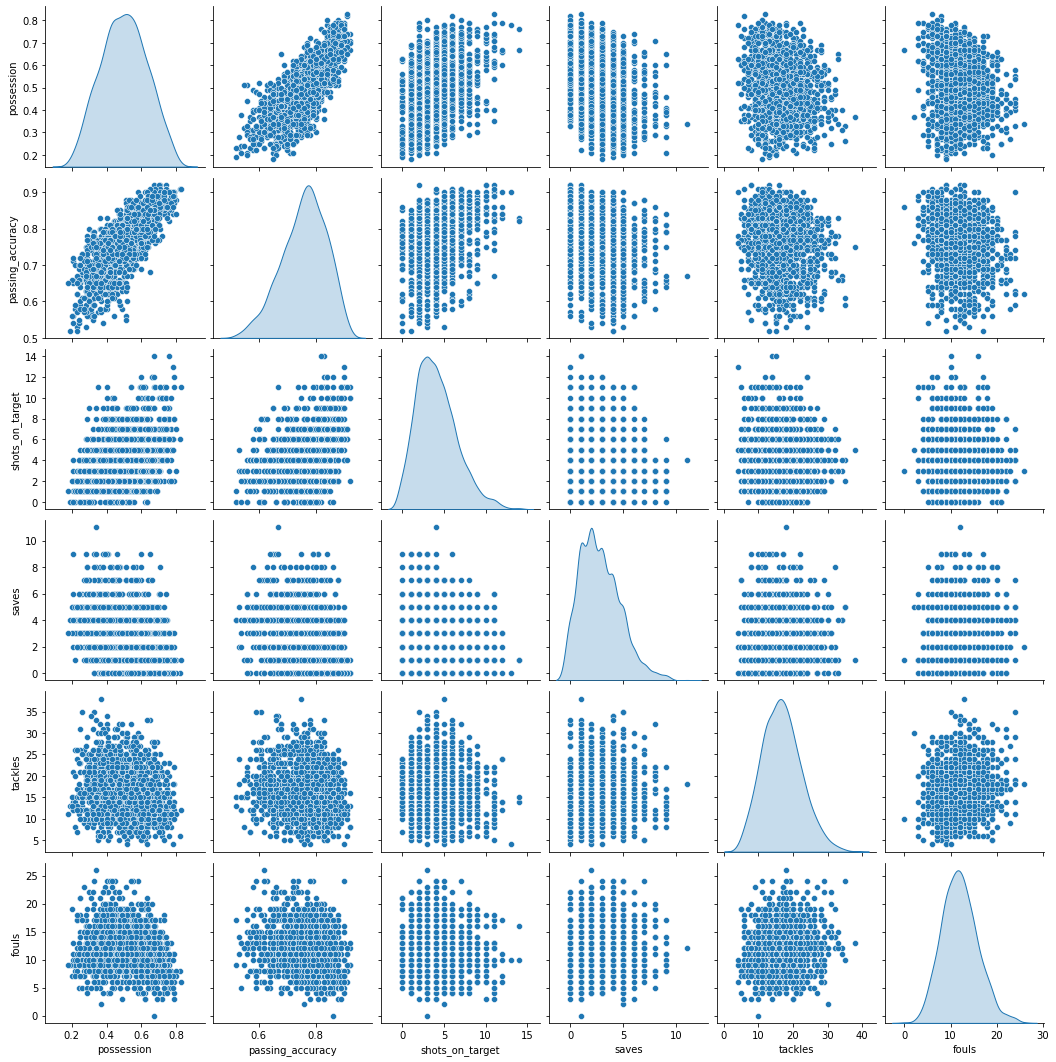

In [13]:
sns.pairplot(train_features[["possession", "passing_accuracy", "shots_on_target", "saves", "tackles", "fouls"]], diag_kind='kde')

Normalize the data.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

### Model creation

Create the base model.

In [19]:
model = models.Sequential([
    keras.Input(shape = (6, )), 
    layers.Dense(6, activation = "elu"),
    layers.Dense(30, activation = "selu"),
    layers.Dense(30, activation = "selu"), 
    layers.Dense(12, activation = "selu"), 
    layers.Dense(1)
])

In [20]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 30)                210       
_________________________________________________________________
dense_7 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_8 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 13        
Total params: 1,567
Trainable params: 1,567
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# To have at least steps_per_epoch * epochs batches
batch = 50
steps = len(train_features)//batch
validation_steps = len(val_features)//batch

In [22]:
model.compile(optimizer = "adam",
              loss = "mse",
              metrics = ['accuracy'])

history = model.fit(train_features, 
                    train_targets, 
                    epochs = 200, 
                    batch_size = batch, 
                    verbose = 0, 
                    steps_per_epoch = steps, 
                    validation_data = (val_features, val_targets), 
                    validation_steps = validation_steps)
display(pd.DataFrame(history.history))

,loss,accuracy,val_loss,val_accuracy
0,2.095643,0.326207,1.317403,0.345714
1,1.208713,0.338538,1.124564,0.345714
2,1.090716,0.338538,1.080145,0.357143
3,1.073893,0.361249,1.050562,0.345714
4,1.051311,0.364798,1.029908,0.354286
...,...,...,...,...
195,0.870898,0.376863,1.026766,0.354286
196,0.857024,0.381831,1.032735,0.345714
197,0.875770,0.412349,1.044084,0.342857
198,0.856987,0.380412,1.024613,0.348571


In [23]:
hist = pd.DataFrame(history.history)
print(hist[hist['val_accuracy'] >= .435])

Empty DataFrame
Columns: [loss, accuracy, val_loss, val_accuracy]
Index: []


### Model evaluation

In [24]:
model.evaluate(test_features, test_targets, verbose = 0)

[0.9865366220474243, 0.3815789520740509]

### Model interpretability

We use partial dependence plots, along with individual conditional expectations.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import partial_dependence, plot_partial_dependence

In [26]:
# sklearn has a bug when utilizing non-sklearn models
# This is incorporated to fix it.
from sklearn.utils import validation

model._estimator_type = "regressor"
model.dummy_ = None   # works around the underscore issue
validation.check_is_fitted(estimator=model)

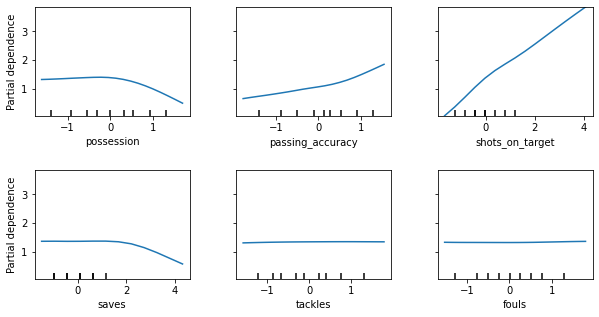

In [27]:
features = ["possession", "passing_accuracy", "shots_on_target", "saves", "tackles", "fouls"]

plot_partial_dependence(model, features = features, X = train_features,
                        feature_names = features, grid_resolution = 20)

fig = plt.gcf()
fig.subplots_adjust(wspace=0.3, hspace=0.5)
fig.set_figheight(5)
fig.set_figwidth(10)

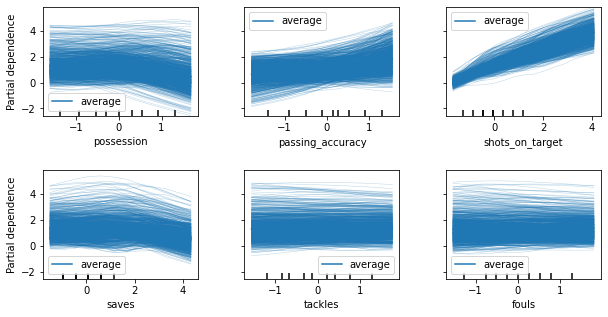

In [28]:
plot_partial_dependence(model, features = features, X = train_features, kind = "both", 
                        feature_names = features, grid_resolution = 20)

fig = plt.gcf()
fig.subplots_adjust(wspace=0.3, hspace=0.5)
fig.set_figheight(5)
fig.set_figwidth(10)

The significant effects observed include a positive relationship between shots on target and goals, <br>
and a negative relationship between saves and goals. <br>
This makes sense, as all the other metrics are not directly related to goals. <br>
However, we can explore this model further using other statistics that are provided.

### Rerun with more features

In [32]:
target = df[["goals"]]
features = df[["possession", "passing_accuracy", "shots_on_target", "saves", "tackles", "fouls", 
               "interceptions", "goal_kicks", "corners", "crosses"]]

train_features, test_features, train_targets, test_targets = train_test_split(features, target, test_size = 0.2)
train_features, val_features, train_targets, val_targets = train_test_split(train_features, train_targets, test_size = 0.2)

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)


In [33]:
model2 = models.Sequential([
    keras.Input(shape = (10, )), 
    layers.Dense(10, activation = "elu"),
    layers.Dense(60, activation = "selu"),
    layers.Dense(30, activation = "selu"), 
    layers.Dense(12, activation = "selu"), 
    layers.Dense(1)
])

# To have at least steps_per_epoch * epochs batches
batch = 50
steps = len(train_features)//batch
validation_steps = len(val_features)//batch

model2.compile(optimizer = "adam",
              loss = "mse")

model2.fit(train_features, 
                    train_targets, 
                    epochs = 200, 
                    batch_size = batch, 
                    verbose = 0, 
                    steps_per_epoch = steps, 
                    validation_data = (val_features, val_targets), 
                    validation_steps = validation_steps)

model2.evaluate(test_features, test_targets, verbose = 0)


1.0800864696502686

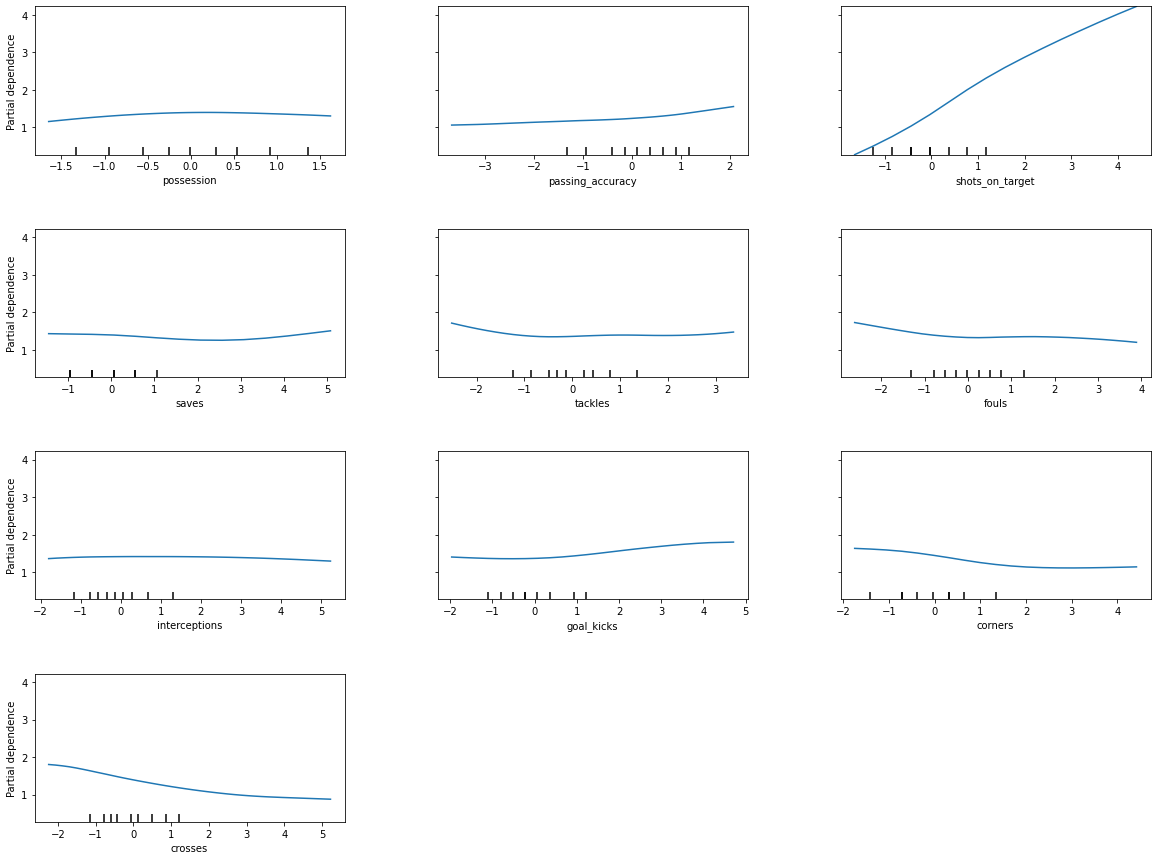

In [34]:
# sklearn has a bug when utilizing non-sklearn models
# This is incorporated to fix it.

model2._estimator_type = "regressor"
model2.dummy_ = None   # works around the underscore issue
validation.check_is_fitted(estimator=model2)

features = ["possession", "passing_accuracy", "shots_on_target", "saves", "tackles", "fouls",
           "interceptions", "goal_kicks", "corners", "crosses"]

plot_partial_dependence(model2, features = features, X = train_features,
                        feature_names = features, grid_resolution = 50)

fig = plt.gcf()
fig.subplots_adjust(wspace=0.3, hspace=0.5)
fig.set_figheight(15)
fig.set_figwidth(20)

Adding interceptions and goal_kicks show a significant negative relationship between them and goals.